Saving diminos_data.csv to diminos_data (1).csv
Columns: Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')
   order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056

===== SUMMARY =====
                       Metric         Value
0                Total Orders  15000.000000
1    Mean Delivery Time (min)     20.499389
2  Median Delivery Time (min)     15.797986
3             90th Percentile     21.156905
4             95th Percentile     27.261044
5             99th Percentile     65.064186
6                    Max Time   7299.831375
7         Orders > 31 min (%)      3.713333

===== KPI CHECK =====
✅ PASS — Franchise Safe

Removed Outliers: 69


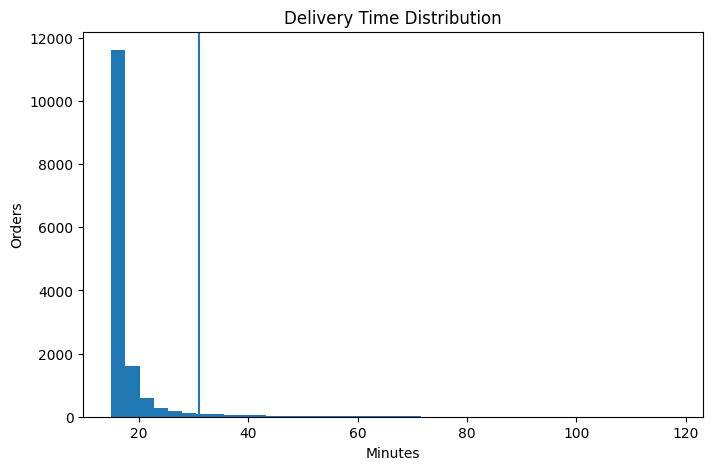

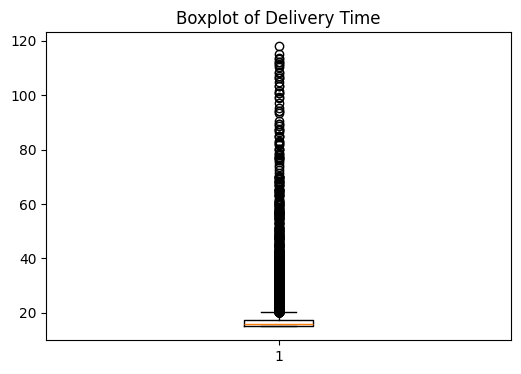

/tmp/ipython-input-2871748233.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["hour"] = clean_df["order_placed_at"].dt.hour


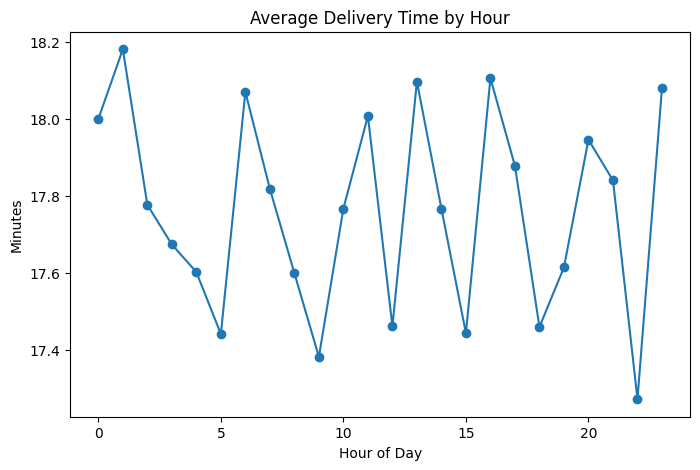

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Files exported successfully!


In [2]:

# DOMINOS STORE DELIVERY TIME ANALYSIS



# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]



# 3. LOAD DATA

df = pd.read_csv(file_name)

print("Columns:", df.columns)
print(df.head())



# 4. DATA CLEANING


# convert to datetime
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

# compute delivery time
df["delivery_minutes"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds() / 60


# remove negative or zero times
df = df[df["delivery_minutes"] > 0]



# 5. SUMMARY STATISTICS


delivery = df["delivery_minutes"]

summary = {
    "Total Orders": len(delivery),
    "Mean Delivery Time (min)": delivery.mean(),
    "Median Delivery Time (min)": delivery.median(),
    "90th Percentile": np.percentile(delivery, 90),
    "95th Percentile": np.percentile(delivery, 95),
    "99th Percentile": np.percentile(delivery, 99),
    "Max Time": delivery.max(),
    "Orders > 31 min (%)": (delivery > 31).mean() * 100
}

summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])

print("\n===== SUMMARY =====")
print(summary_df)



# 6. KPI CHECK (Business Rule)

p95 = np.percentile(delivery, 95)

print("\n===== KPI CHECK =====")

if p95 < 31:
    print("✅ PASS — Franchise Safe")
else:
    print("❌ FAIL — Risk of losing franchise")



# 7. OUTLIER REMOVAL


# remove unrealistic deliveries > 120 min
clean_df = df[df["delivery_minutes"] <= 120]

print("\nRemoved Outliers:", len(df) - len(clean_df))



# 8. VISUALIZATIONS


# Histogram
plt.figure(figsize=(8,5))
plt.hist(clean_df["delivery_minutes"], bins=40)
plt.axvline(31)
plt.title("Delivery Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Orders")
plt.show()


# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(clean_df["delivery_minutes"])
plt.title("Boxplot of Delivery Time")
plt.show()


# Hourly performance
clean_df["hour"] = clean_df["order_placed_at"].dt.hour

hourly = clean_df.groupby("hour")["delivery_minutes"].mean()

plt.figure(figsize=(8,5))
hourly.plot(kind="line", marker="o")
plt.title("Average Delivery Time by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Minutes")
plt.show()



# 9. SAVE OUTPUT FILES


summary_df.to_csv("delivery_summary.csv", index=False)
clean_df.to_csv("delivery_cleaned.csv", index=False)

files.download("delivery_summary.csv")
files.download("delivery_cleaned.csv")


print("\nFiles exported successfully!")